In [163]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [266]:
def make_poly_matrix(x, deg=5):
    # given a d-dim vector x = [x1, x2, .. xd], make a d x (M+1) matrix 
    # 1 x1 x1**2 ... x1**M
    # 1 x2 x2**2 ... x2**M
    # ..
    # 1 xd xd**2 ... xd**M
    
    X = [np.ones(len(x))]
    x1 = x.copy()
    for i in np.arange(deg):
        X.append(x1)
        x1 = x1 * x

    X = np.asarray(X).T # d x M matrix of input 
    # print(X.shape)
    return X

In [267]:
def poly_regression(x_train, y_train, deg=9, alpha=0):
    # fit polynomial regression of given degree with L2 regularizer alpha
    X = make_poly_matrix(x_train, deg=deg)
    w_hat = np.linalg.pinv(X.T @ X + alpha*np.identity(X.shape[1])) @ X.T @ y_train
    y_hat_train = X @ w_hat
    return y_hat_train, w_hat

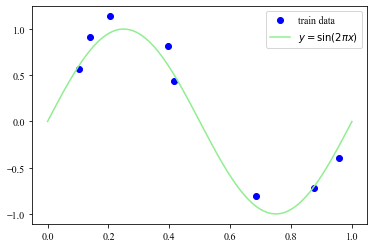

In [271]:
# Generate train and test data from y = sin(2\pi x) + N(0,\sigma^2)

np.random.seed(1)
N = 8
sigma = 0.35
x_train = []
y_train = []
x_test = []
y_test = []
for i in np.arange(N):
    U1 = np.random.rand()
    U2 = np.random.rand()
    e1 = np.random.normal(0,sigma**2)
    e2 = np.random.normal(0,sigma**2) 
    x_train.append(U1)
    x_test.append(U2)
    y_train.append(np.sin(2*np.pi*U1)+e1)
    y_test.append(np.sin(2*np.pi*U2)+e2)
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

# make plot
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x_train, y_train, 'o', color='blue', label="train data")
x = np.linspace(0, 1, 100)
ax.plot(x, np.sin(2*np.pi*x), color='lightgreen', label="$y=\sin(2\pi x)$")
ax.legend()

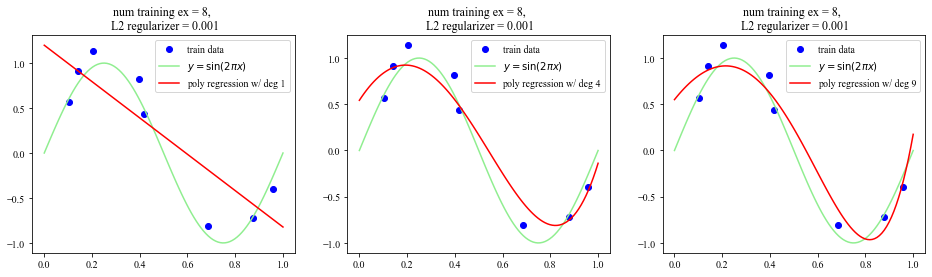

In [272]:
# plot fitted polynomial regression curve
deg_list = [1,4,9] # degree of polynomial 
alpha_list = [0, 0.001, 0.01, 0.1]
fig, ax = plt.subplots(nrows=1, ncols=len(deg_list), figsize=[16, 4])
for i in np.arange(len(deg_list)):
    # make plot
    M = deg_list[i]
    alpha = alpha_list[1]
    y_hat_train, w_hat = poly_regression(x_train, y_train, deg=M, alpha=alpha)
    ax[i].plot(x_train, y_train, 'o', color='blue', label="train data")
    x = np.linspace(0, 1, 100)
    ax[i].plot(x, np.sin(2*np.pi*x), color='lightgreen', label="$y=\sin(2\pi x)$")
    # ax.plot(x_train, y_hat_train, 'o', color = 'red')
    y_poly = make_poly_matrix(x, deg=M) @ w_hat
    ax[i].plot(x, y_poly, color = 'red', label="poly regression w/ deg %i" % M)
    ax[i].title.set_text("num training ex = %i, \n L2 regularizer = %.3f" % (N, alpha)) 
    ax[i].legend()
    plt.savefig('poly_fitting_ex_2.pdf', bbox_inches='tight')
    

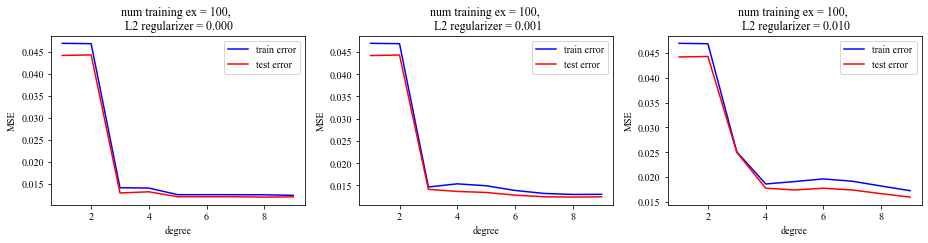

In [270]:
# plot the test error for multiple values of hyperparameters 

deg_list = np.arange(1,10)
alpha_list = [0, 0.001, 0.01, 0.1, 1]
error_train_mx = np.zeros(shape=[len(deg_list), len(alpha_list)])
error_test_mx = np.zeros(shape=[len(deg_list), len(alpha_list)])

for i in np.arange(len(deg_list)):
    for j in np.arange(len(alpha_list)):
        y_hat_train, w_hat = poly_regression(x_train, y_train, deg=deg_list[i], alpha=alpha_list[j])
        y_hat_test = make_poly_matrix(x_test, deg=deg_list[i]) @ w_hat
        error_train_mx[i, j] = np.linalg.norm(y_train-y_hat_train, 2)/N
        error_test_mx[i, j] = np.linalg.norm(y_test-y_hat_test, 2)/N
# print('!!!', error_mx)


# make plot
ncols = 3
fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=[13,4])
for i in np.arange(ncols):
    ax[i].plot(deg_list, error_train_mx[:,i], color='blue', label="train error")
    ax[i].plot(deg_list, error_test_mx[:,i], color='red', label="test error")
    ax[i].set_xlabel('degree', fontsize=10)
    ax[i].title.set_text("num training ex = %i, \n L2 regularizer = %.3f" % (N, alpha_list[i])) 
    ax[i].set_ylabel('MSE', fontsize=10)
    ax[i].legend()
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('poly_error_ex_2.pdf')
